# Heart Disease Prediction with Logistic Regression

In this project, we'll use a dataset to predict the risk of heart disease based on a single health features such as cholesterol. The target variable is "condition," where: 
- **0** indicates no heart disease
- **1** indicates the presence of heart disease

In [4]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("heart_cleveland_upload.csv")

# Display the first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


| **Feature**       | **Description**                                                                                                                                      |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **age**           | Represents the **age** of the individual in years.                                                                                                  |
| **sex**           | Represents the **sex** of the individual. <br> **1.0**: Male <br> **0.0**: Female                                                                  |
| **cp**            | Represents the **chest pain type**. <br> **0.0**: Typical angina <br> **1.0**: Atypical angina <br> **2.0**: Non-anginal pain <br> **3.0**: Asymptomatic |
| **trestbps**      | Represents the **resting blood pressure** (mmHg).                                                                                                   |
| **chol**          | Represents the **serum cholesterol** level (mg/dl).                                                                                                |
| **fbs**           | Represents **fasting blood sugar** level. <br> **1.0**: Fasting blood sugar > 120 mg/dl <br> **0.0**: Fasting blood sugar <= 120 mg/dl               |
| **restecg**       | Represents the **resting electrocardiographic results**. <br> **0.0**: Normal <br> **1.0**: ST-T wave abnormality <br> **2.0**: Left ventricular hypertrophy |
| **thalach**       | Represents the **maximum heart rate achieved** during exercise.                                                                                   |
| **exang**         | Represents whether the individual experienced **exercise-induced angina**. <br> **1.0**: Yes <br> **0.0**: No                                     |
| **oldpeak**       | Represents the **depression of the ST segment** induced by exercise relative to rest (in mm).                                                      |
| **slope**         | Represents the **slope of the peak exercise ST segment**. <br> **0.0**: Upsloping <br> **1.0**: Flat <br> **2.0**: Downsloping                     |
| **ca**            | Represents the number of **major vessels colored by fluoroscopy** (angiogram) that have blockages. <br> Values range from 0 to 4.                    |
| **thal**          | Represents the individual's **thalassemia** status. <br> **0.0**: Normal <br> **1.0**: Fixed defect <br> **2.0**: Reversible defect                   |
| **condition**     | Represents whether the individual has **heart disease**. <br> **0.0**: No heart disease <br> **1.0**: Heart disease present                        |


Remove other features for now, and just focus on understanding the logistic regression model using just cholesterol as the input

In [73]:
X = df[['oldpeak']]               # Feature: oldpeak
y = df['condition']            # Target: 0 or 1
X.head()

,oldpeak
0,0.1
1,1.8
2,2.6
3,1.4
4,1.8


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

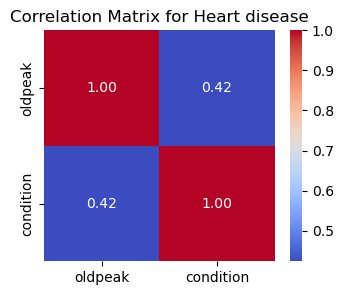

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_df = df[['oldpeak', 'condition']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix for Heart disease')
plt.savefig("img/corrHeartDis.png", dpi=300, bbox_inches='tight')
plt.show()


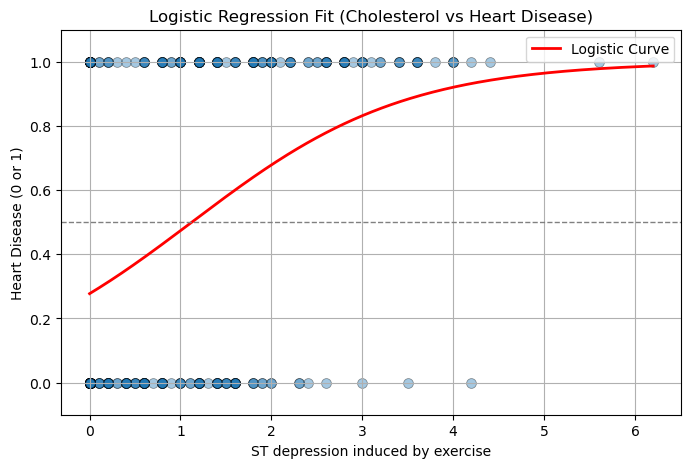

In [77]:
# Generate a clean plot
plt.figure(figsize=(8, 5))

# 1. Scatterplot of data points with jitter for visibility
sns.scatterplot(x='oldpeak', y='condition', data=df, alpha=0.4, s=50, edgecolor='k')
plt.xlabel("ST depression induced by exercise")
plt.ylabel("Heart Disease (0 or 1)")
plt.title("Logistic Regression Fit (Cholesterol vs Heart Disease)")

# 2. Generate smooth range of cholesterol values
# Create a DataFrame with the same column name as used in training
oldpeak_range = pd.DataFrame({'oldpeak': np.linspace(df['oldpeak'].min(), df['oldpeak'].max(), 300)})

# 3. Predict probabilities using the trained model
predicted_probs = model.predict_proba(oldpeak_range)[:, 1]

# 4. Plot the logistic (sigmoid) curve
plt.plot(oldpeak_range, predicted_probs, color='red', linewidth=2, label="Logistic Curve")

# Optional: add 0.5 threshold line
plt.axhline(0.5, linestyle='--', color='gray', linewidth=1)

plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)  # Ensure sigmoid is fully visible
plt.savefig("img/CholHeartDis.png", dpi=300, bbox_inches='tight')

plt.show()


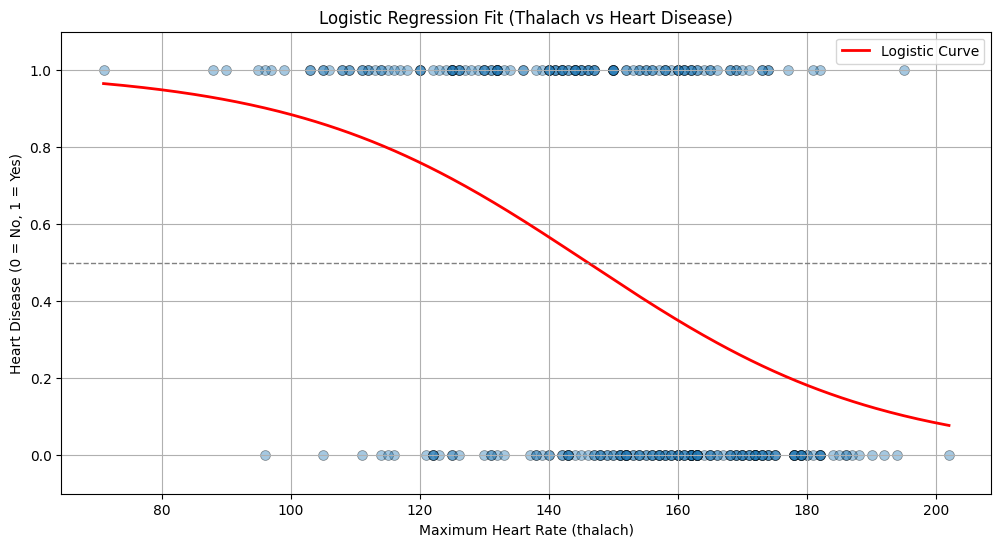

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Prepare data
X = df[['thalach']]  # Feature: max heart rate
y = df['condition']  # Target: heart disease (0 or 1)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Create range of thalach values for smooth curve
thalach_range = pd.DataFrame({'thalach': np.linspace(df['thalach'].min(), df['thalach'].max(), 300)})
probs = model.predict_proba(thalach_range)[:, 1]  # Probability of heart disease (class = 1)

# Plotting
plt.figure(figsize=(12, 6))

# Scatter actual data
sns.scatterplot(x='thalach', y='condition', data=df, alpha=0.4, s=50, edgecolor='k')

# Plot sigmoid curve
plt.plot(thalach_range, probs, color='red', linewidth=2, label='Logistic Curve')

# Optional: decision boundary line at 0.5
plt.axhline(0.5, linestyle='--', color='gray', linewidth=1)

# Labels and formatting
plt.xlabel("Maximum Heart Rate (thalach)")
plt.ylabel("Heart Disease (0 = No, 1 = Yes)")
plt.title("Logistic Regression Fit (Thalach vs Heart Disease)")
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.savefig("img/thalachHeartDis.png", dpi=300, bbox_inches='tight')
plt.show()



C:\Users\shrey\AppData\Local\Temp\ipykernel_2376\4033870184.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  petal_range = np.linspace(X_binary.min()[0], X_binary.max()[0], 300).reshape(-1, 1)
C:\Users\shrey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


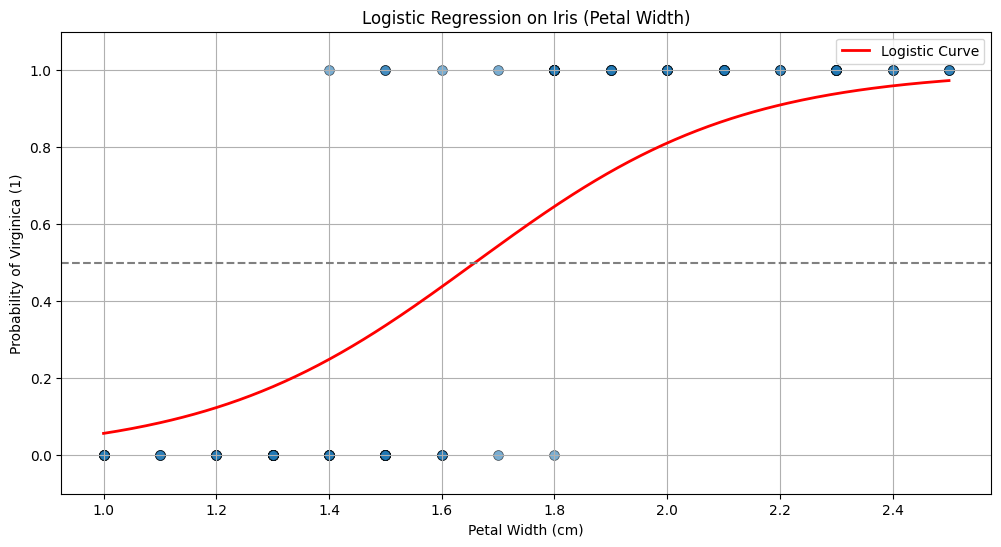

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target
target_names = iris.target_names

# Convert to DataFrame for clarity
df_iris = X.copy()
df_iris['species'] = y

# Filter for binary classification: versicolor (1) and virginica (2)
df_binary = df_iris[df_iris['species'].isin([1, 2])].copy()

# Relabel for clarity: versicolor=0, virginica=1
df_binary['species'] = df_binary['species'].map({1: 0, 2: 1})

# Use only petal width as feature
X_binary = df_binary[['petal width (cm)']]
y_binary = df_binary['species']

# Fit logistic regression
model = LogisticRegression()
model.fit(X_binary, y_binary)

# Create range of petal width values
petal_range = np.linspace(X_binary.min()[0], X_binary.max()[0], 300).reshape(-1, 1)
probs = model.predict_proba(petal_range)[:, 1]

# Plot
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(x='petal width (cm)', y='species', data=df_binary, s=50, alpha=0.6, edgecolor='k')

# Plot sigmoid
plt.plot(petal_range, probs, color='red', linewidth=2, label='Logistic Curve')

# Add threshold line
plt.axhline(0.5, linestyle='--', color='gray')

# Labels
plt.title("Logistic Regression on Iris (Petal Width)")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability of Virginica (1)")
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)
plt.savefig("img/PetalWidth.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\shrey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


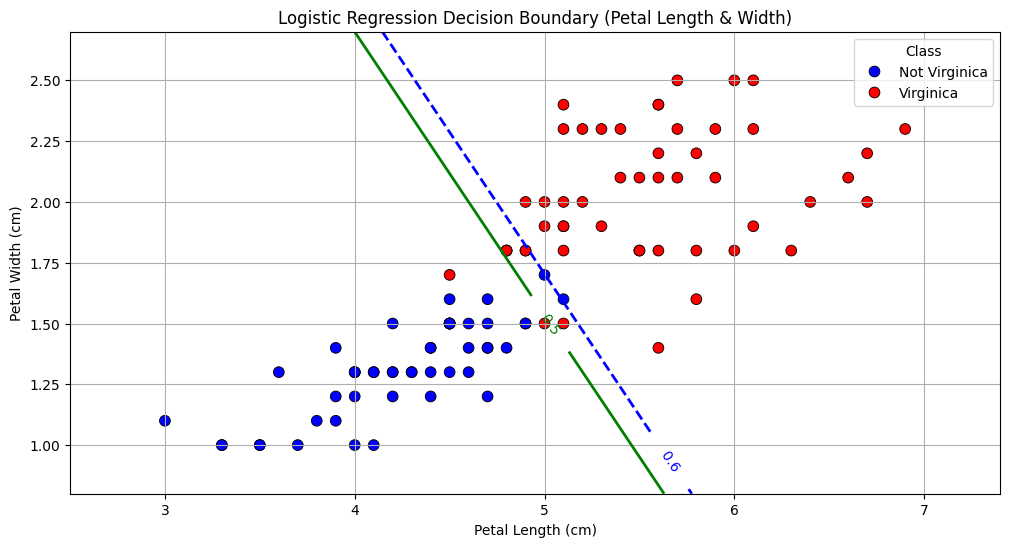

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load iris dataset
iris = load_iris(as_frame=True)
df = iris.frame.copy()

# Filter for binary classification: versicolor (1) and virginica (2)
df_binary = df[df['target'].isin([1, 2])].copy()
df_binary['target'] = df_binary['target'].map({1: 0, 2: 1})  # 0: versicolor, 1: virginica

# Select features
X = df_binary[['petal length (cm)', 'petal width (cm)']]
y = df_binary['target']

# Train logistic regression
model = LogisticRegression()
model.fit(X, y)

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot of data points
sns.scatterplot(
    x='petal length (cm)', y='petal width (cm)',
    hue='target', palette={0: 'blue', 1: 'red'},
    data=df_binary, s=60, edgecolor='k'
)

# Create meshgrid for decision boundary
x_min, x_max = X['petal length (cm)'].min() - 0.5, X['petal length (cm)'].max() + 0.5
y_min, y_max = X['petal width (cm)'].min() - 0.2, X['petal width (cm)'].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict probabilities for meshgrid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot decision boundary (0.5 threshold)
contour_05 = plt.contour(xx, yy, probs, levels=[0.5], colors='green', linewidths=2, linestyles='solid')
contour_06 = plt.contour(xx, yy, probs, levels=[0.6], colors='blue', linewidths=2, linestyles='dashed')

plt.clabel(contour_05, fmt='    0.5    ', inline=True)
plt.clabel(contour_06, fmt='    0.6    ',inline=True)


# Labels and formatting
plt.title("Logistic Regression Decision Boundary (Petal Length & Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Class")
plt.grid(True)

# After plotting everything (scatter + contours)...

handles, labels = plt.gca().get_legend_handles_labels()
custom_labels = ["Not Virginica", "Virginica"]
plt.legend(handles=handles, labels=custom_labels, title="Class")
plt.savefig("img/decBoundary.png", dpi=300, bbox_inches='tight')
plt.show()


                  petal width (cm)    target
petal width (cm)          1.000000  0.828129
target                    0.828129  1.000000


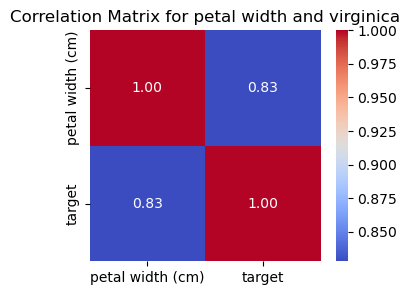

In [82]:
corr = df_binary[['petal width (cm)', 'target']].corr()
print(corr)

# Plot heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix for petal width and virginica')
plt.savefig("img/corrPetal.png", dpi=300, bbox_inches='tight')
plt.show()
